# Examples of calculation sheet
The following cells give an example of how to use the Structensor loading and simply supported beam analysis packages

## About thes Calculations

These calculations are compiled in Jupyter Labs using Python. The calculations use some Classes developed by Structensor Consulting Ltd to make structural design efficient and transparent. If required the source code of these calculations can be provided to checking authorities. 

The calculations are undertaken in accordacne with limit state design principles in accordance with BS EN 1990.

## Project Description

Add information about the project and the brief here.

## Structural Principles

Add descriptions and assumptions about the structure here. 


In [1]:
from simple_beam_analysis import *
from loading import *#

## Weight of materials

The following weights of materials are used in the structural design in accordance with BS EN 1990.

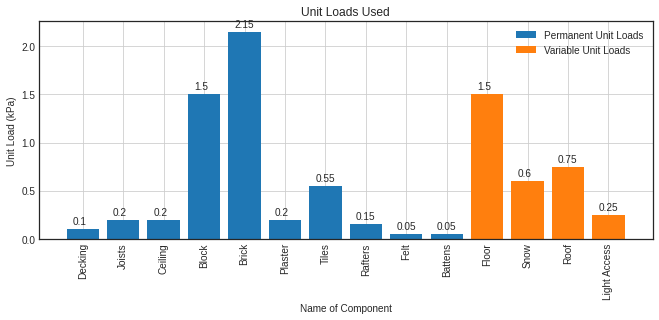

In [2]:
Load.print_component_loads()

## Element loading

Elements of the structure have permanent and variable loads as calculated from the above by summing the relevent components. 


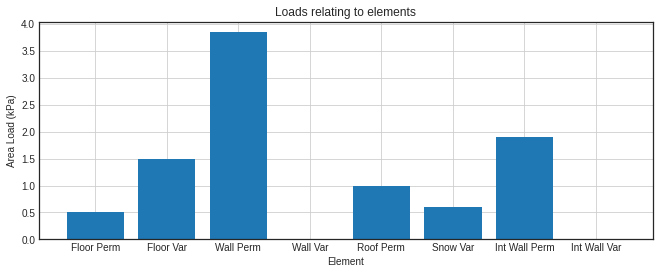

In [7]:
# calculate the loads of building elements
floor_perm = [Load.sum_components(['Decking', 'Joists', 'Ceiling']), 'Floor Perm']
wall_perm = [Load.sum_components(['Brick', 'Block', 'Plaster']), 'Wall Perm']
floor_var = [Load.var_loads['Floor'], 'Floor Var']
wall_var = [0, 'Wall Var']
roof_perm = [Load.sum_components(['Tiles', 'Felt', 'Battens', 'Rafters', 'Ceiling']), 'Roof Perm']
roof_var = [Load.var_loads['Snow'], 'Snow Var']
intwall_perm = [Load.sum_components(['Block', 'Plaster', 'Plaster']), 'Int Wall Perm']
intwall_var = [0, 'Int Wall Var']

# Plot the calculated loading for the elements
Load.plot_elements([floor_perm, floor_var, wall_perm, wall_var, 
                    roof_perm, roof_var, intwall_perm, intwall_var])

## Loading on an beam

The code below is an example of calculating load on a beam element

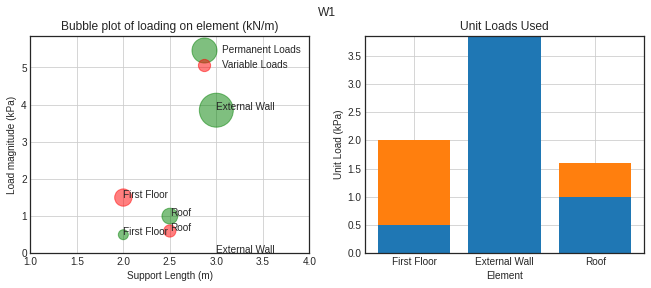

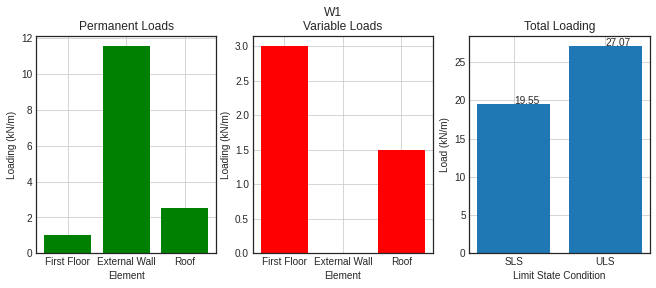

In [4]:
# Set the elements and the supported length of the elements that are to make up the load
floor = [floor_perm[0], floor_var[0], 2, 'First Floor']
wall = [wall_perm[0], wall_var[0], 3, 'External Wall']
roof = [roof_perm[0], roof_var[0], 2.5, 'Roof']

# For an instanace of a line load from the above and perform calculations
w1 = Load([floor, wall, roof])

# Provide a graphical plot of the line load and it components
w1.plot_load_components(ref = 'W1')

## Beam analysis

The above loading applied to a simply supported beam yiels the following shear force and bending moment diagram.

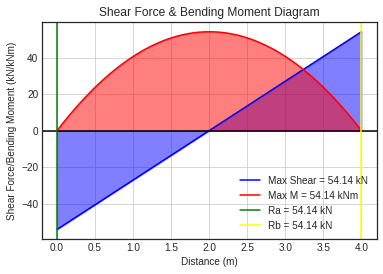

In [5]:
test = Beam(4, [[0,4,w1.uls_load]])
test.force_diagram()